# Wine-Quality-Prediction
### Presented by:- Tanisha Verma

In [33]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
#removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [34]:
df=pd.read_csv('C:/Users/Dell/BHARAT INTERN/winequality-red.csv')

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [37]:
print(df.shape)

(1599, 12)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [41]:
df.duplicated().sum()

240

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

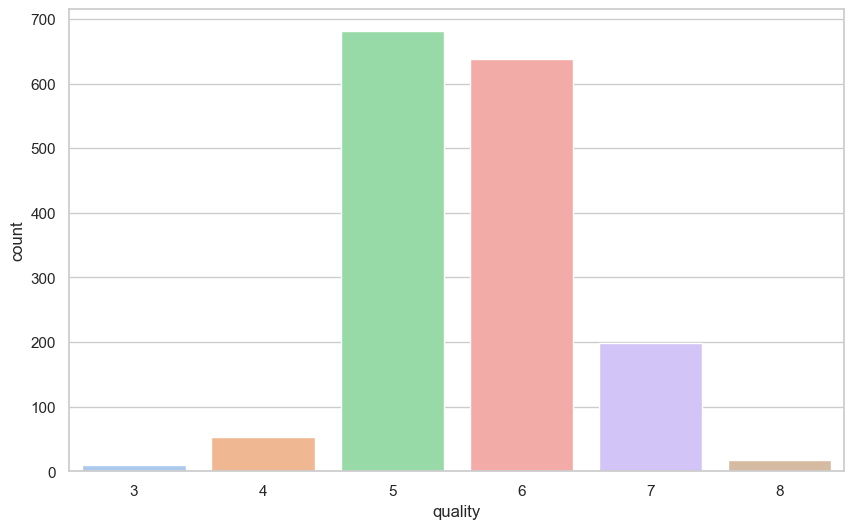

In [42]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(x='quality',data=df,palette='pastel')

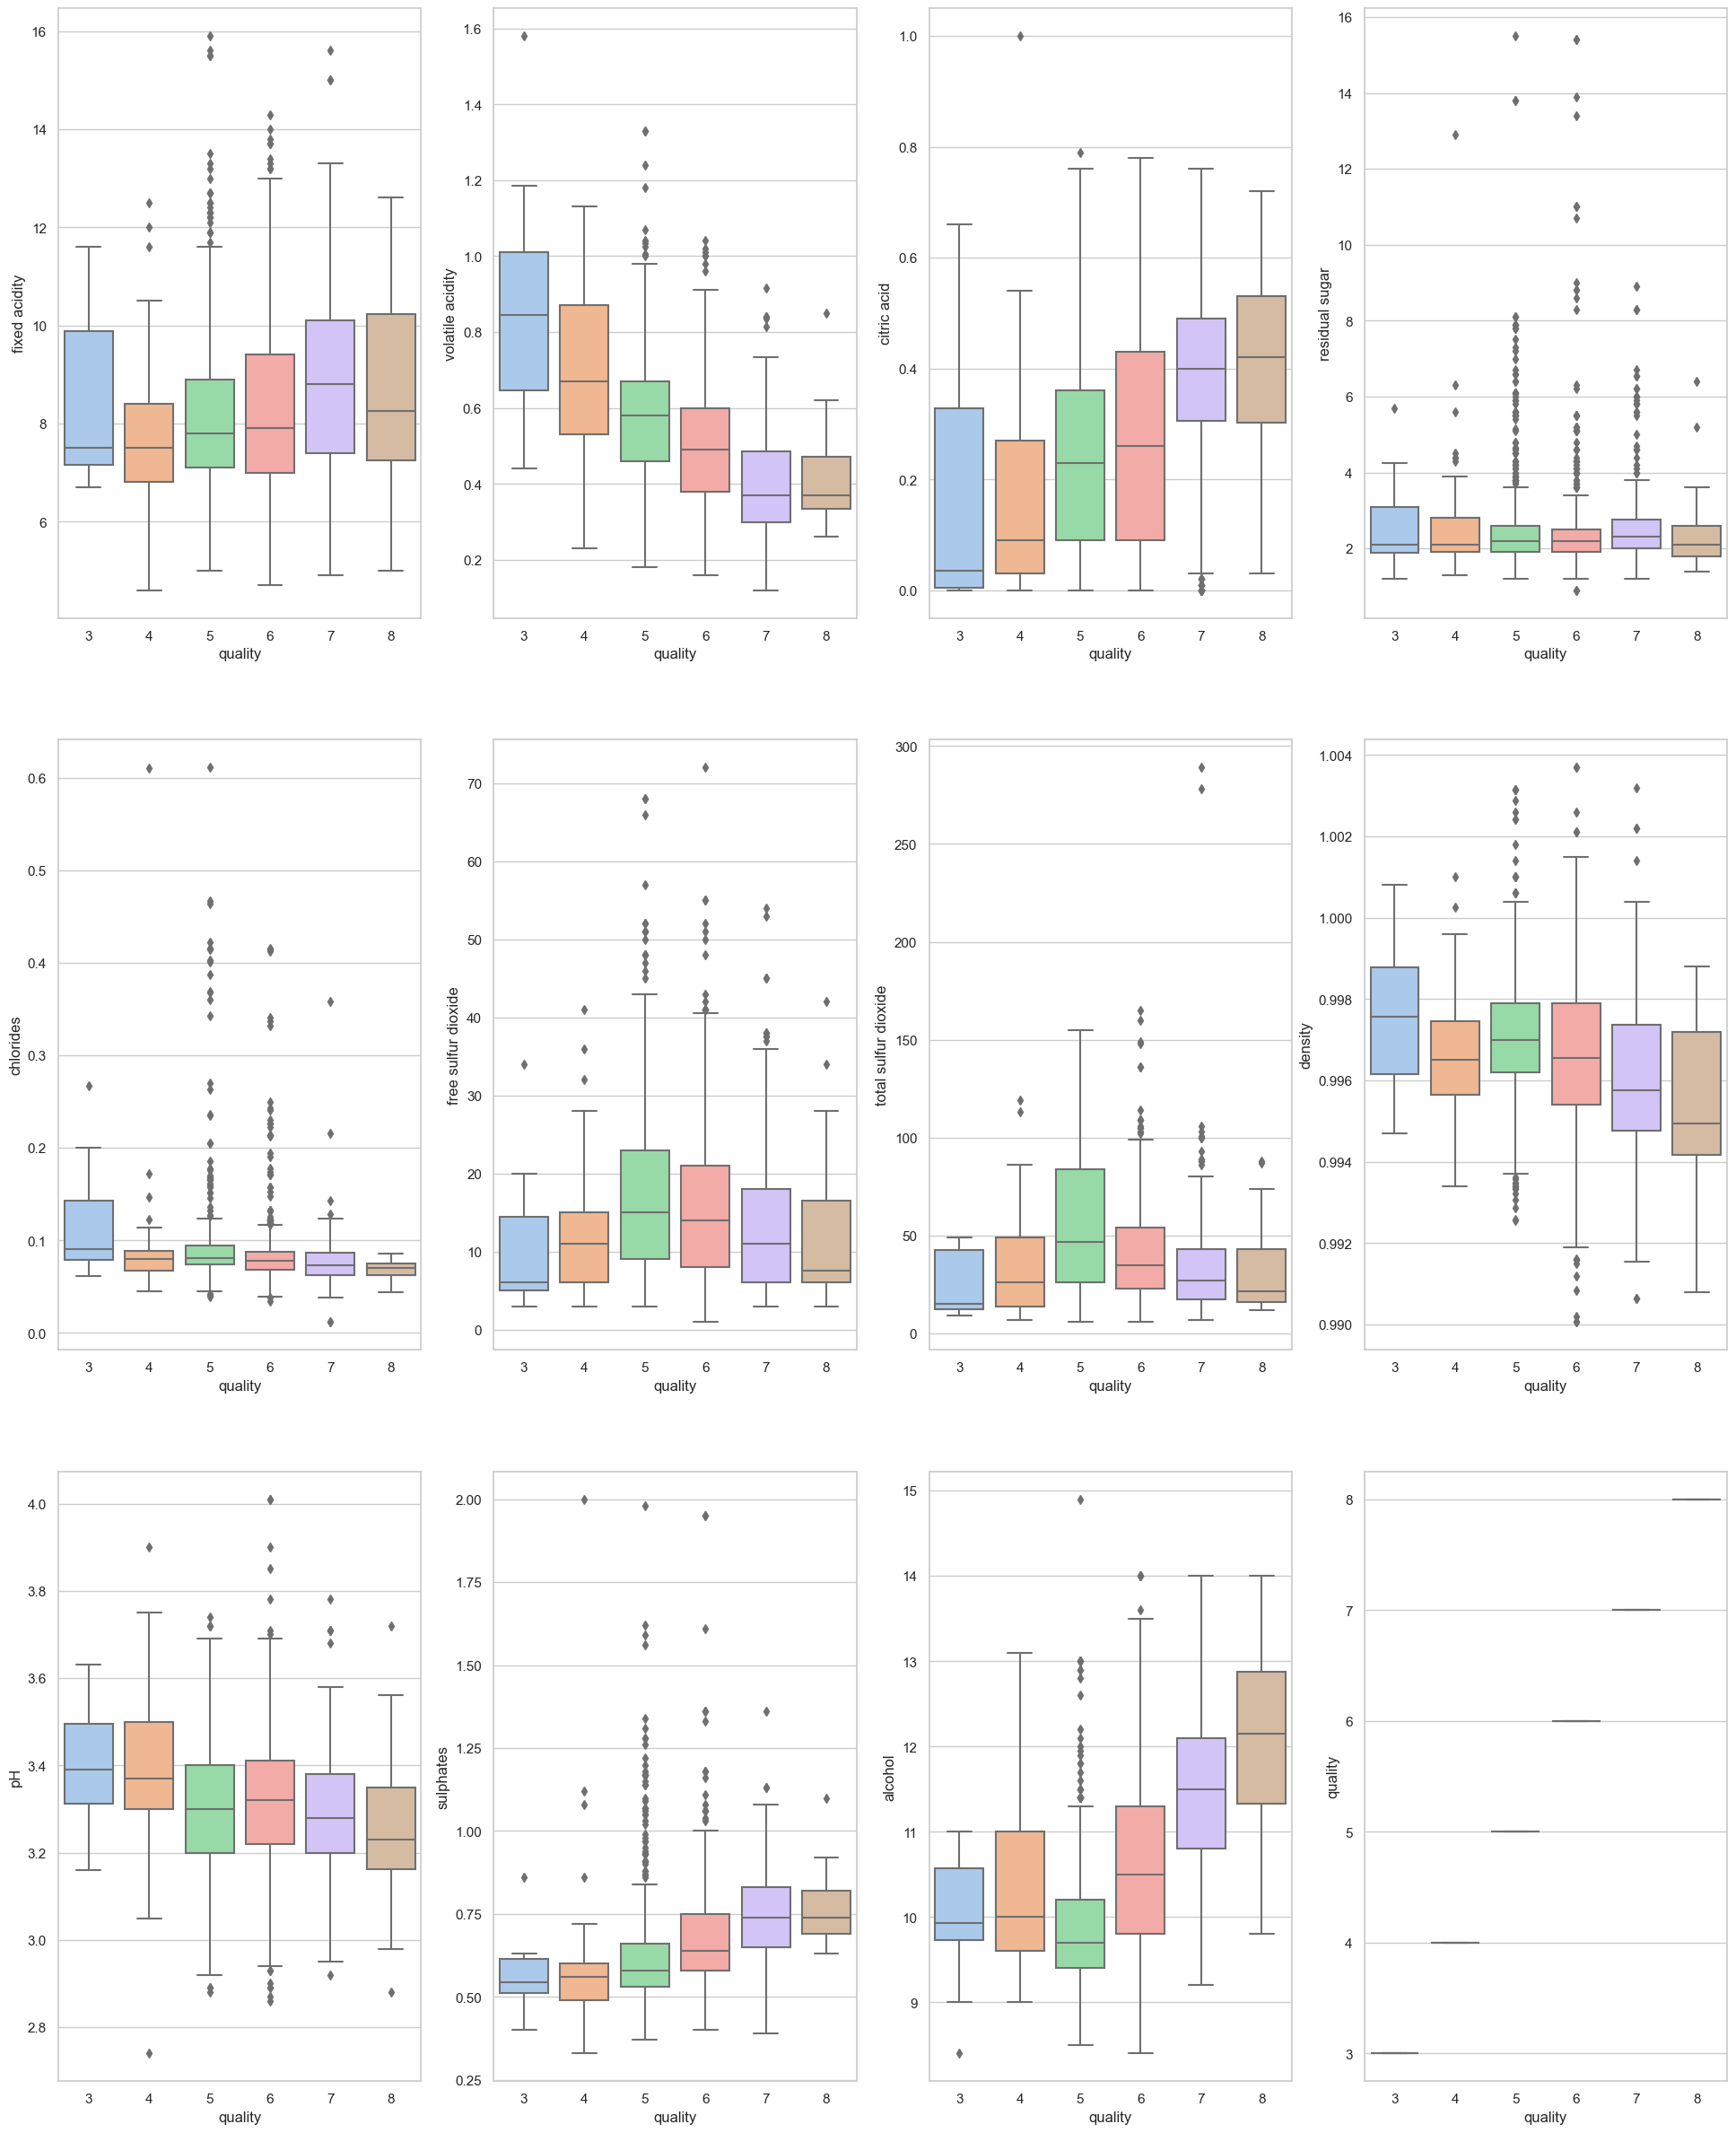

In [43]:
sns.set(style='whitegrid')
fig,ax1=plt.subplots(3,4,figsize=(24,30))
k=0
columns=list(df.columns)
for i in range(3):
    for j in range(4):
        sns.boxplot(x='quality',y=df.columns[k],data=df,ax=ax1[i][j], palette='pastel')
        k+=1
plt.show()

<Axes: >

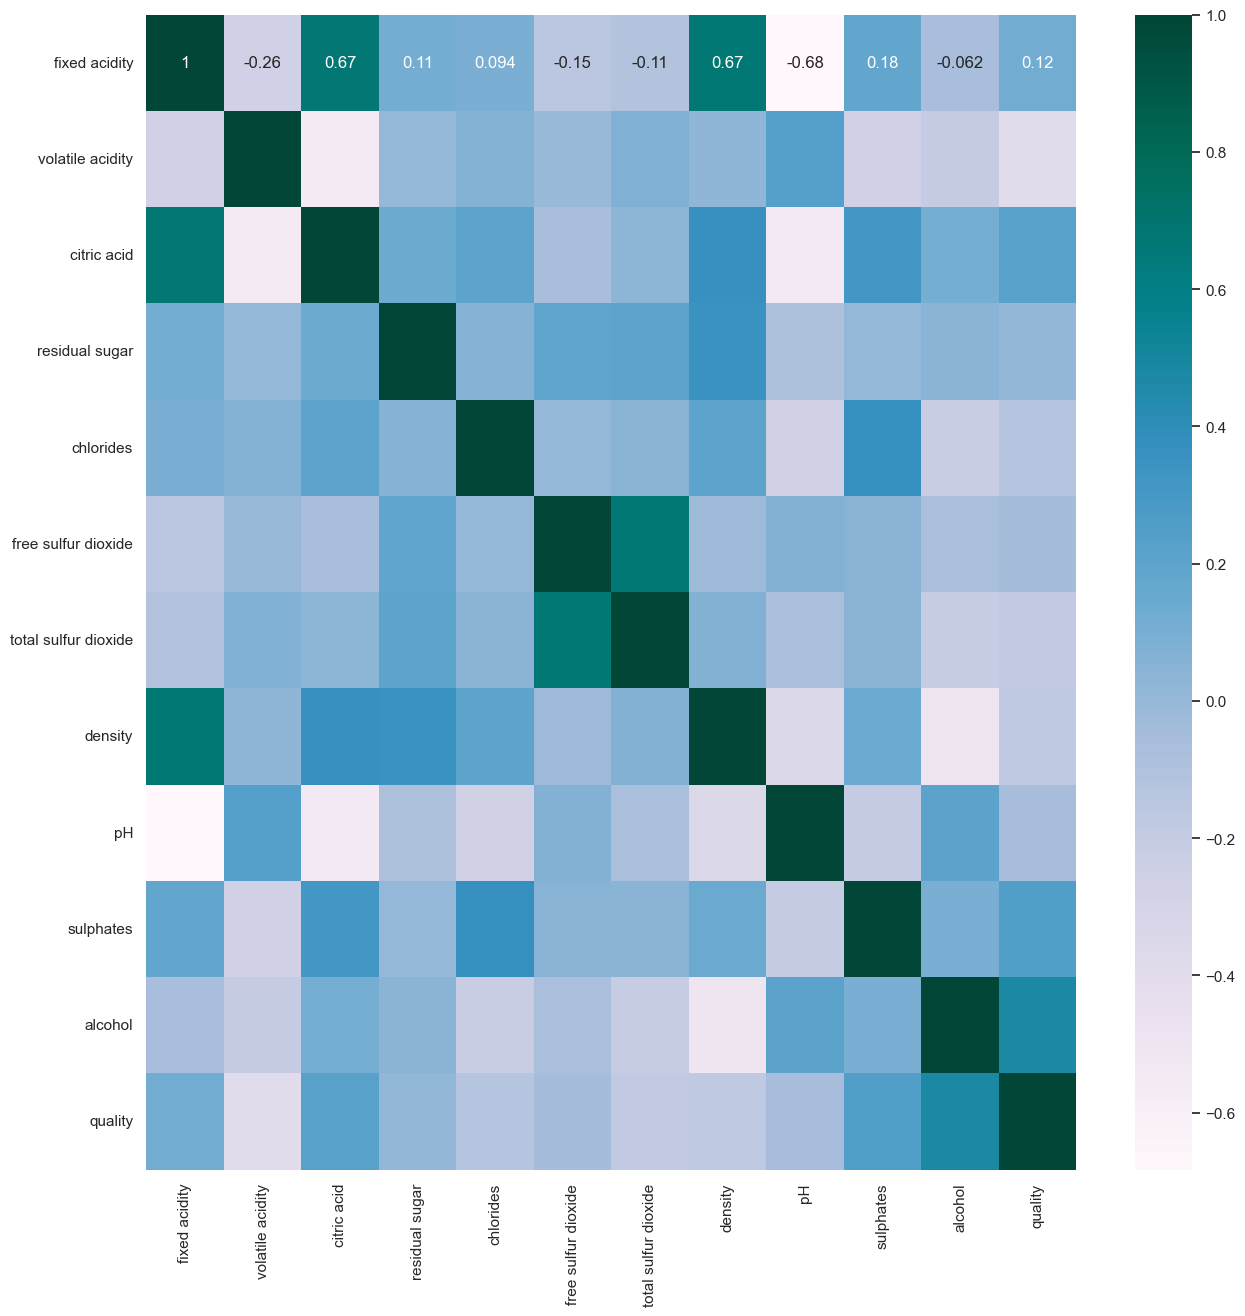

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn')

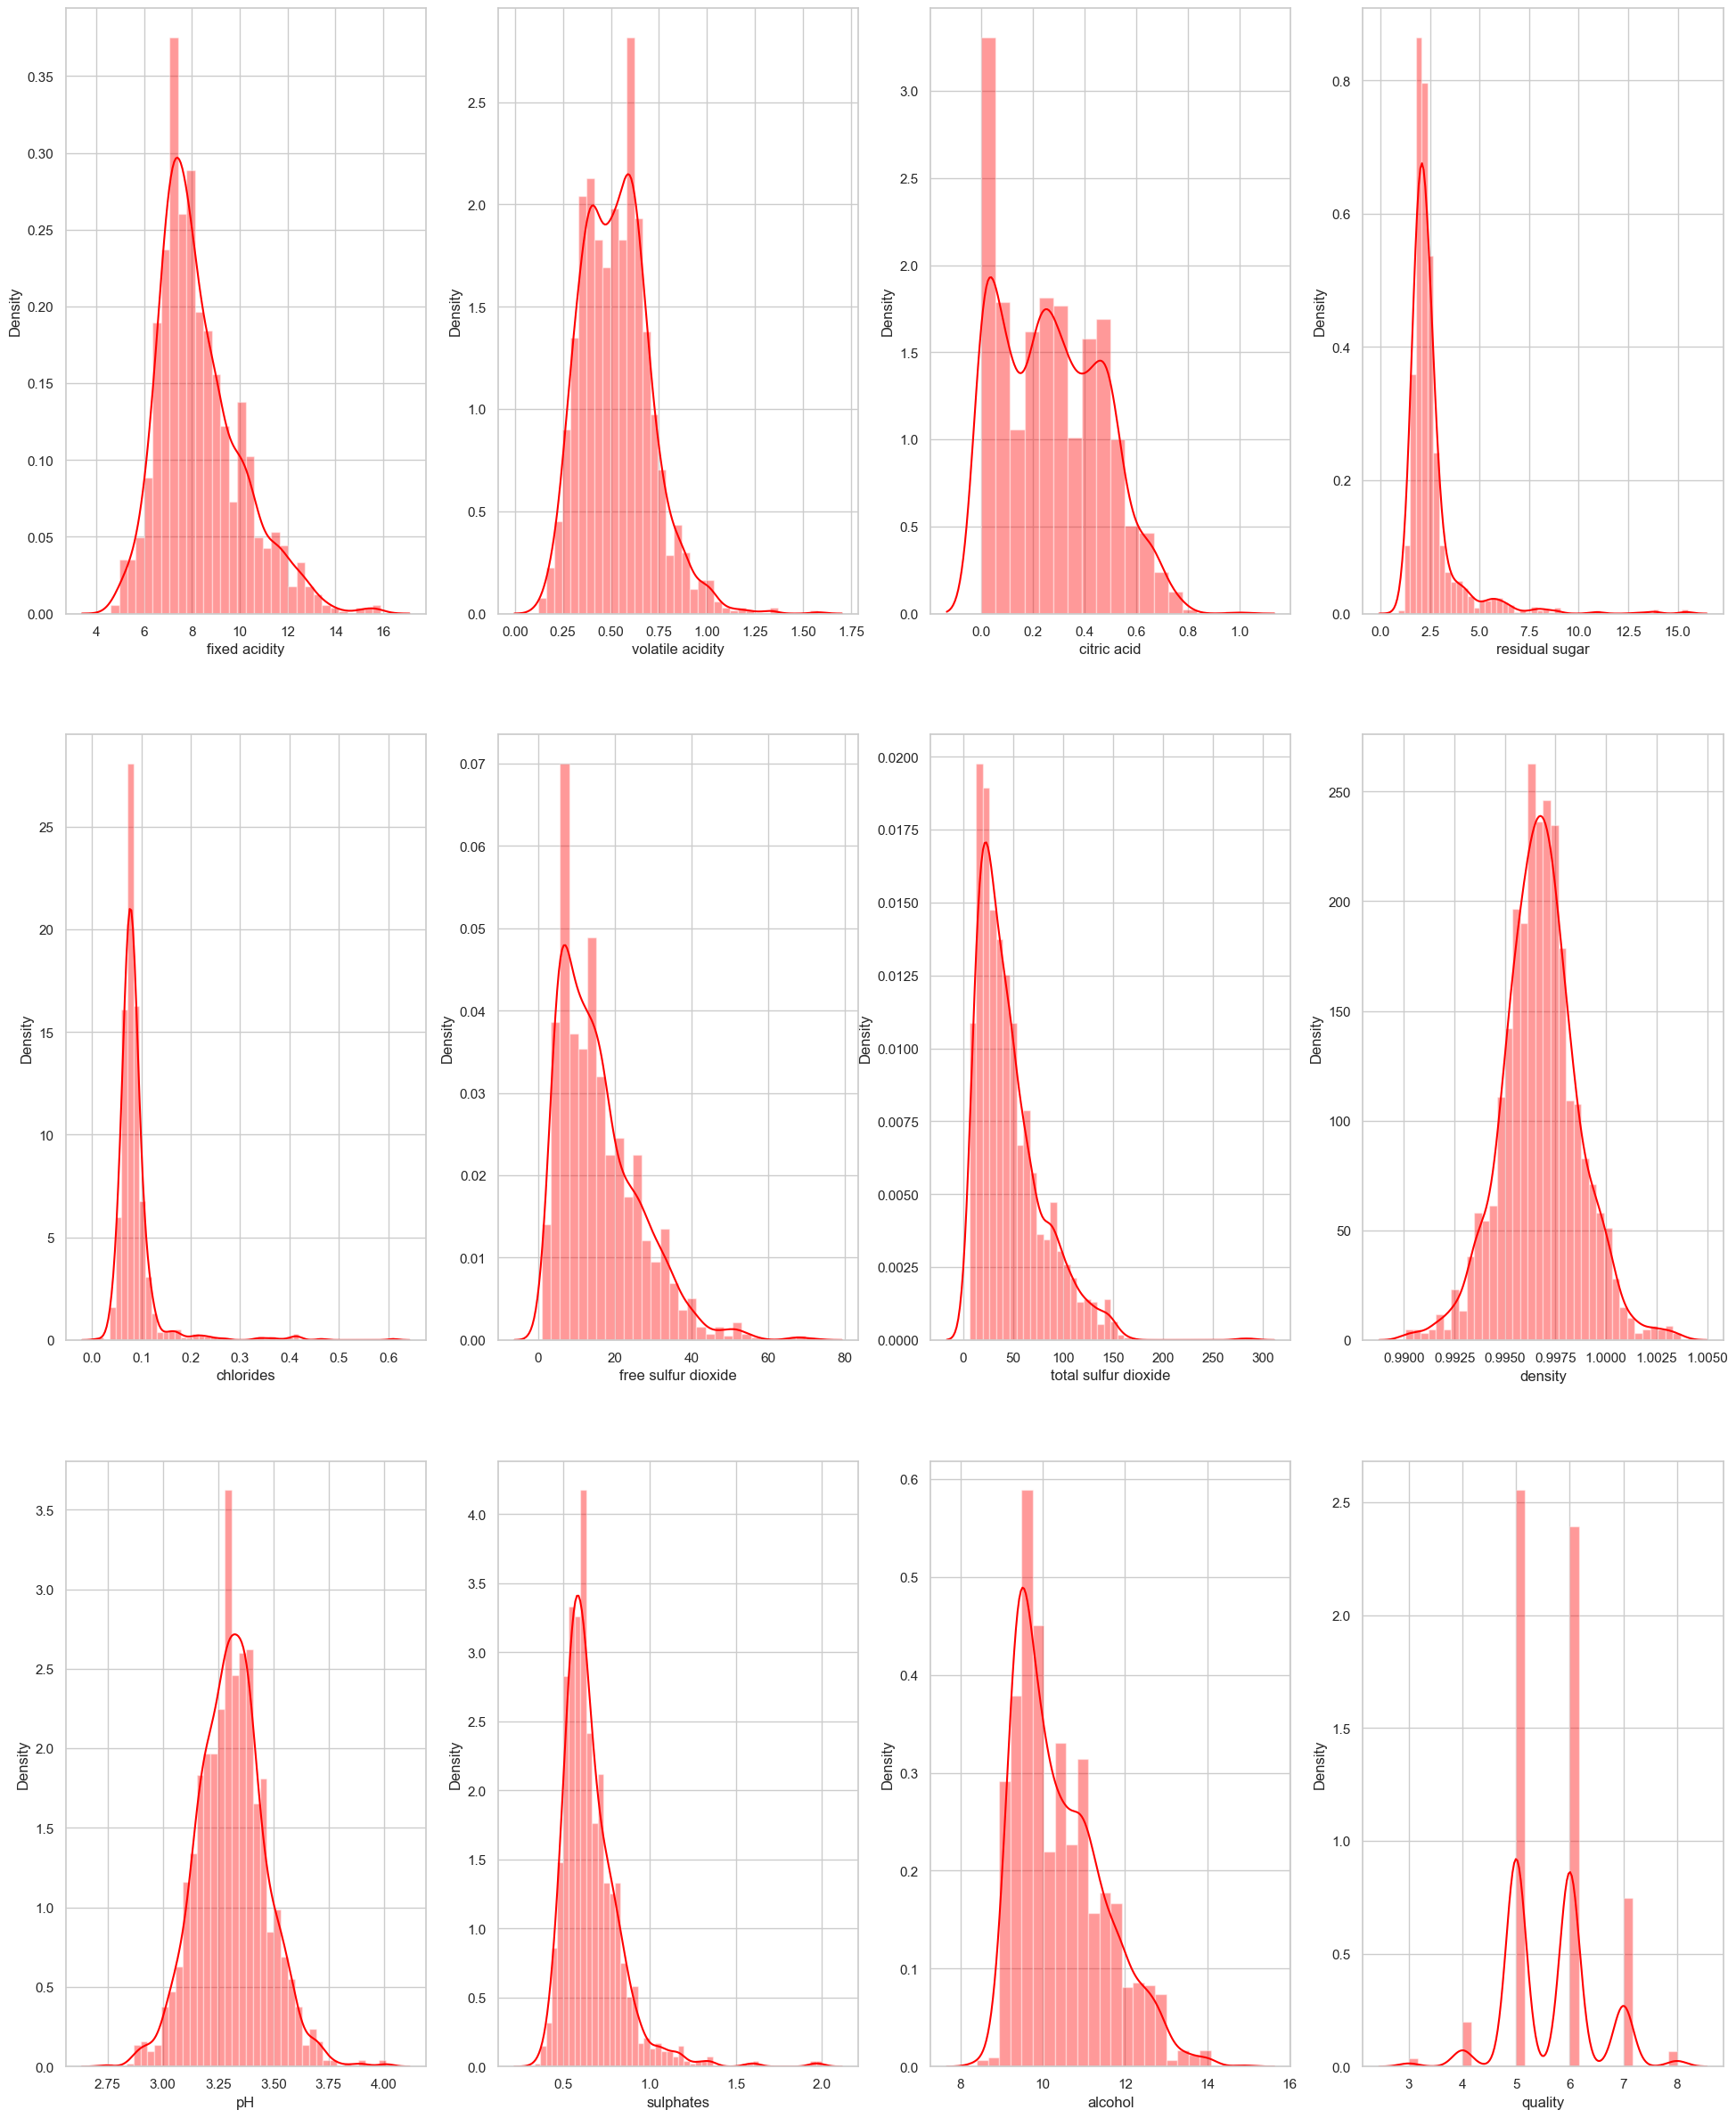

In [45]:
color=sns.color_palette("pastel")
fig,ax1=plt.subplots(3,4,figsize=(24,30))
k=0
columns=list(df.columns)
for i in range(3):
    for j in range(4):
        sns.distplot(df[columns[k]],ax=ax1[i][j],color='red')
        k+=1
plt.show()

In [46]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

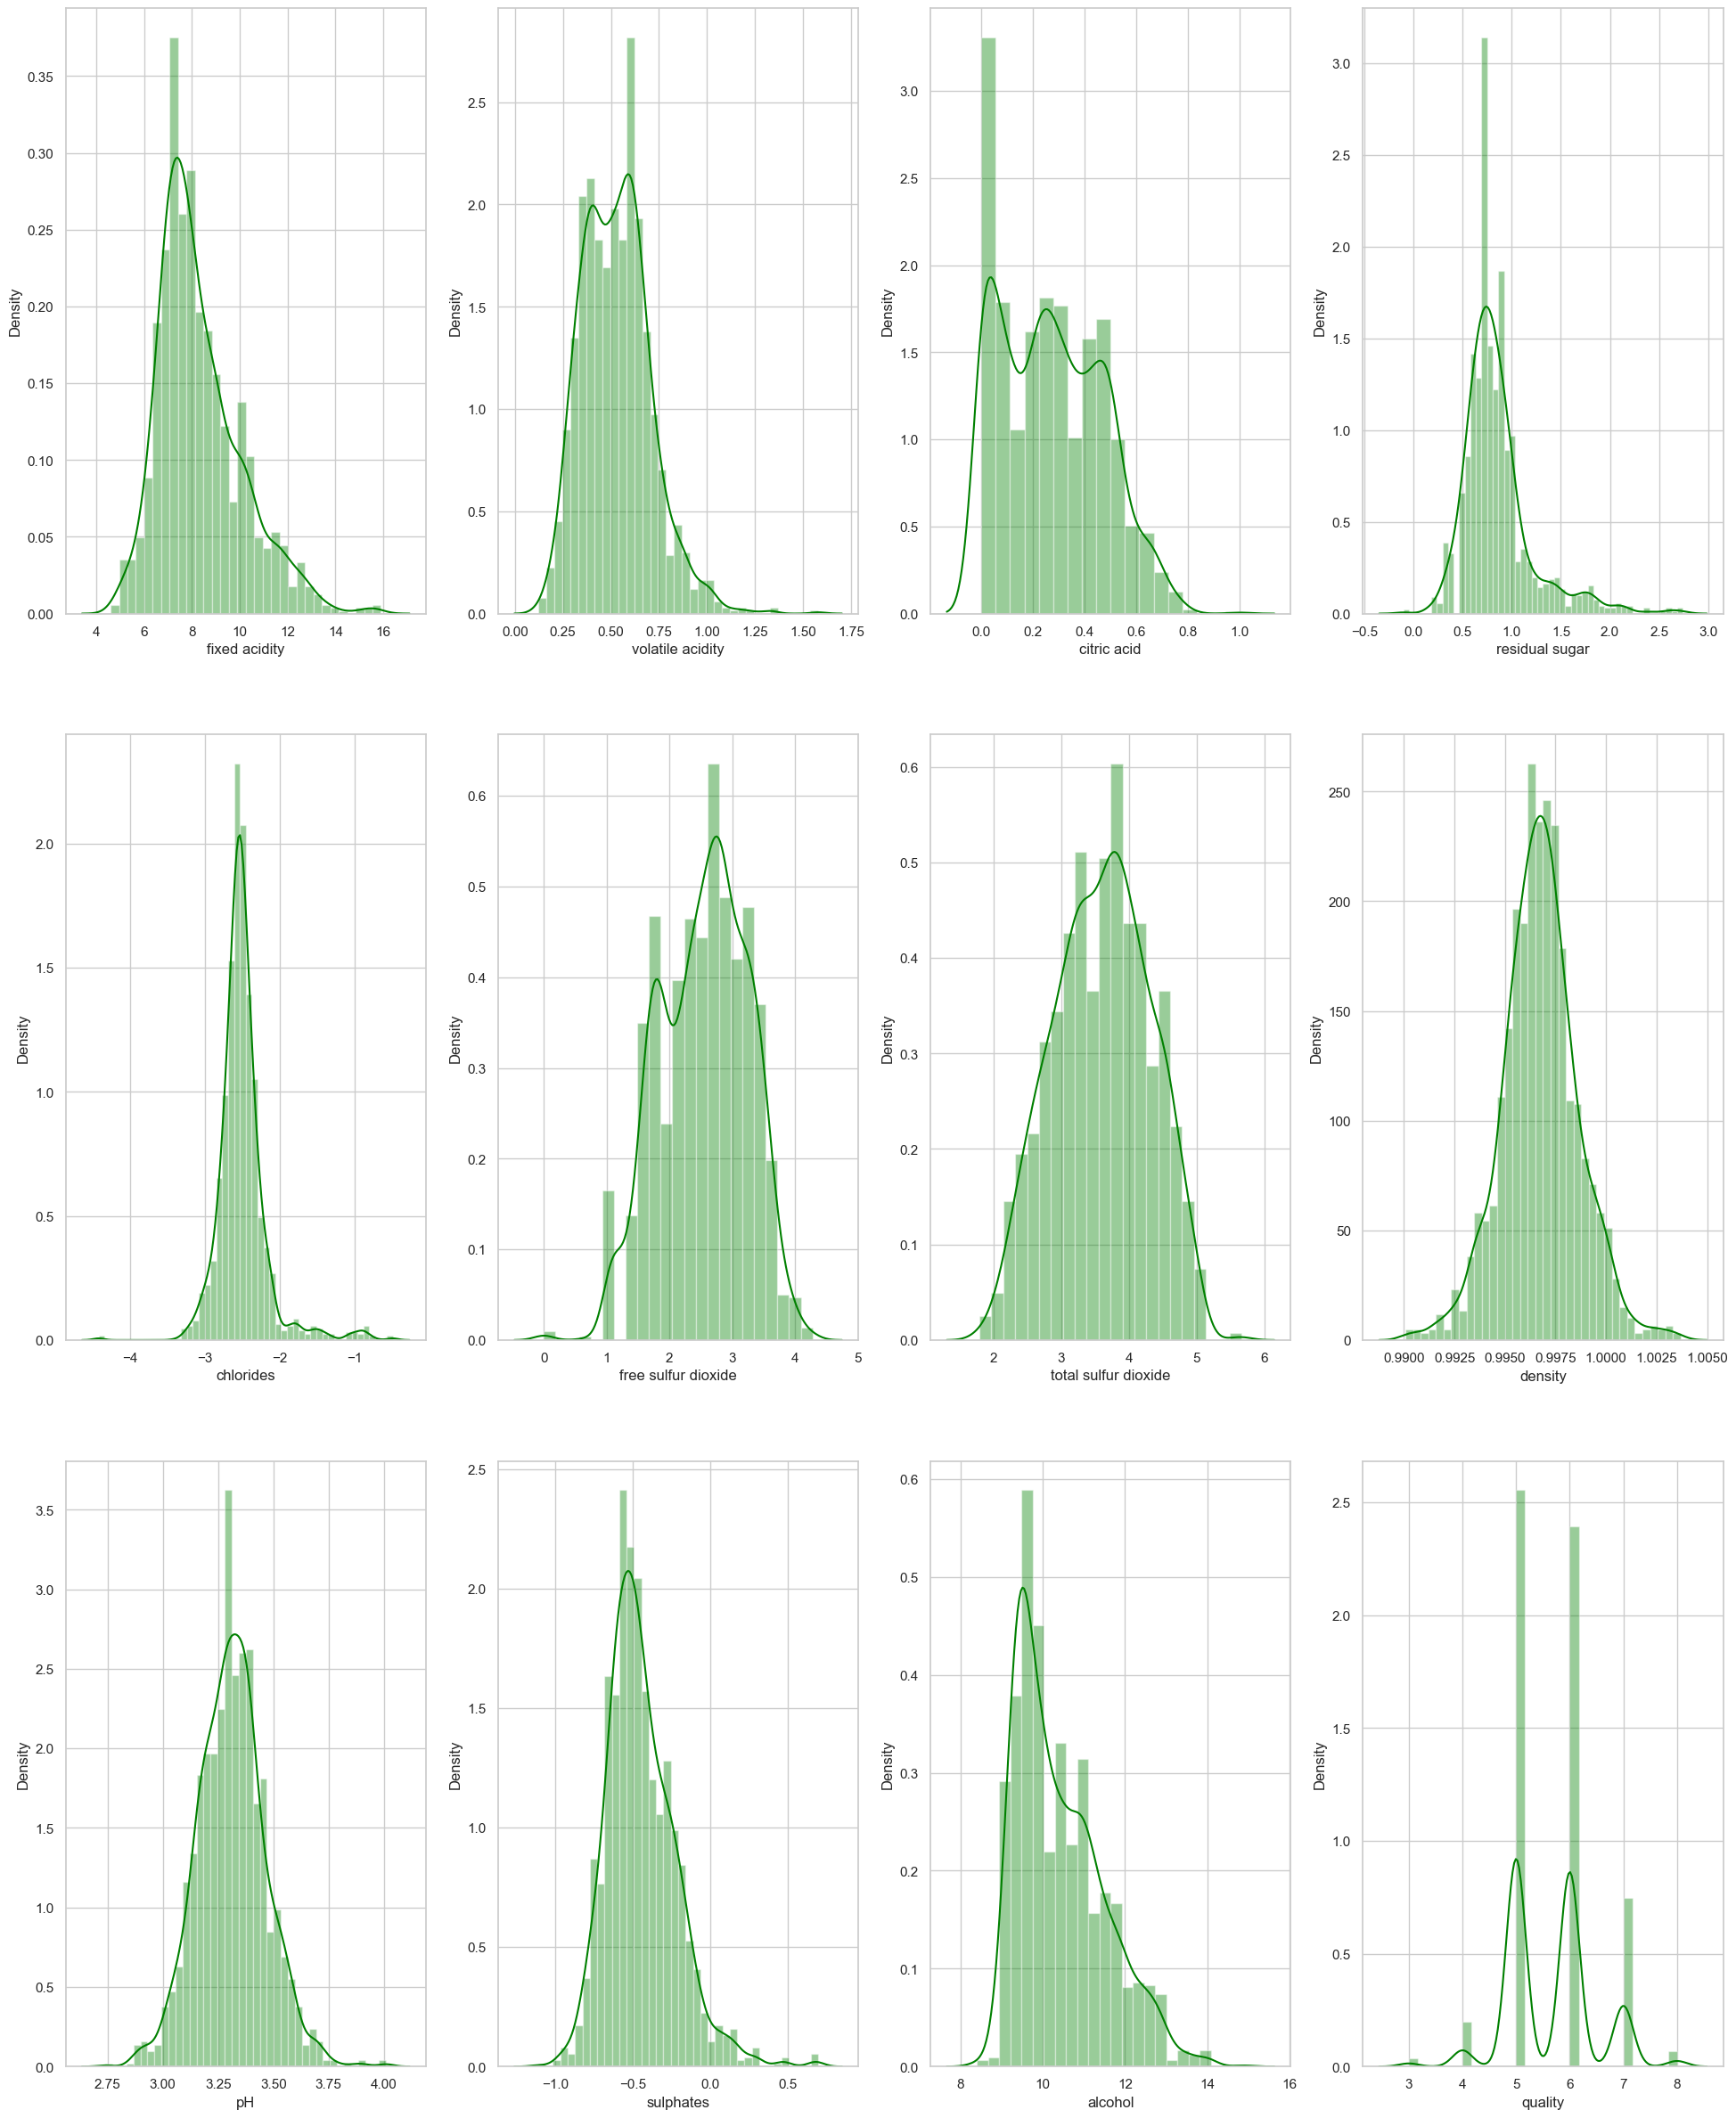

In [47]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

In [48]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

In [49]:
df_3 = df[df.quality==3]          
df_4 = df[df.quality==4]
df_5 = df[df.quality==5]
df_6 = df[df.quality==6]
df_7 = df[df.quality==7]
df_8 = df[df.quality==8]

In [50]:
df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12)

In [51]:
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)

In [52]:
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)
Balanced_df.quality.value_counts()

quality
3    600
4    600
7    600
8    600
5    600
6    600
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

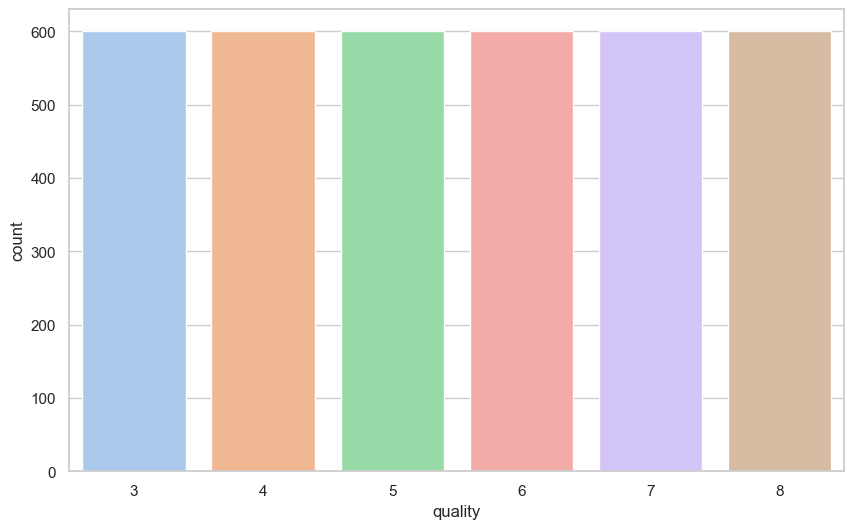

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8], palette='pastel')

<Axes: xlabel='quality', ylabel='alcohol'>

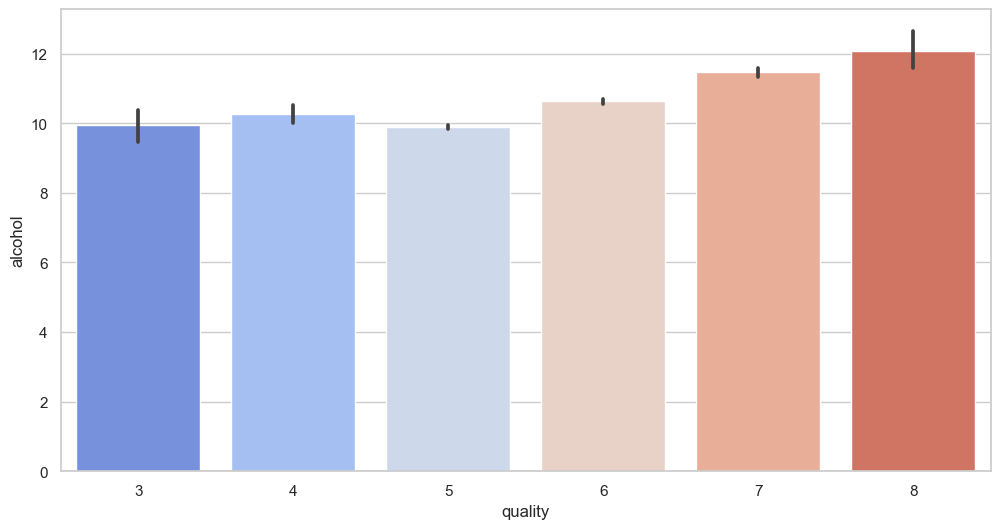

In [54]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

Text(0, 0.5, 'Features')

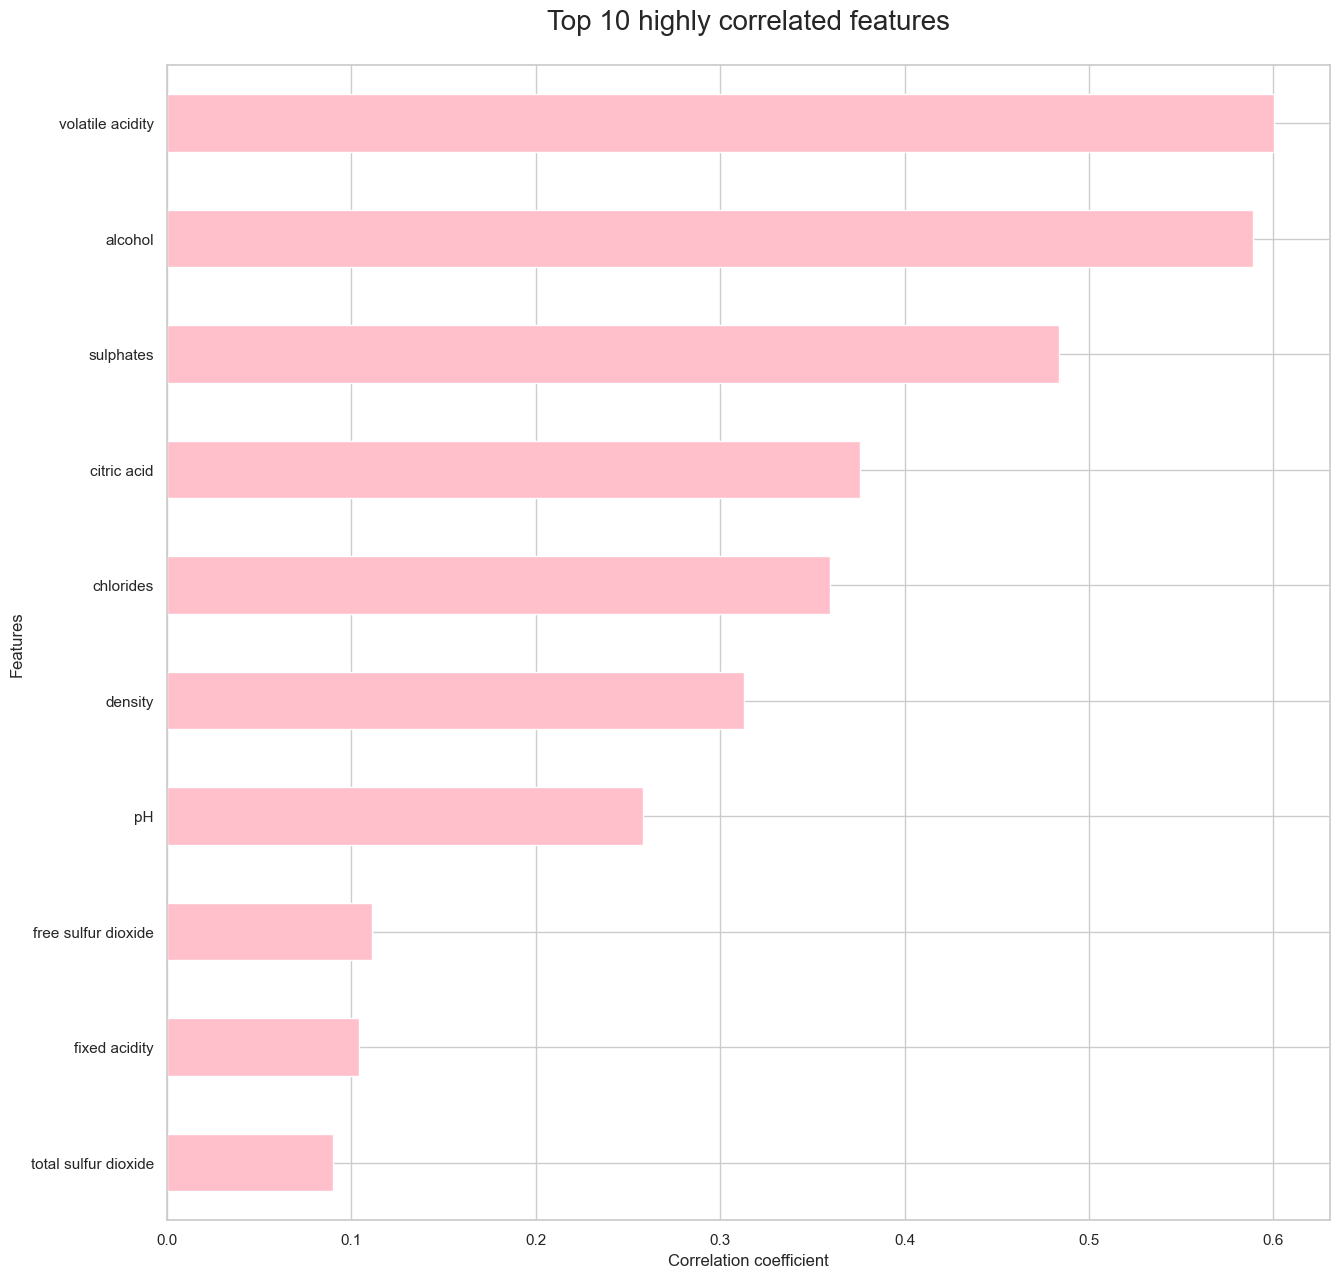

In [55]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink') 
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [56]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [57]:
X = Balanced_df[selected_features]
y = Balanced_df.quality

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=13)

In [59]:
for n_neighbors in [5,10,15,20]:
    model=KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train)
    scr=model.score(X_test,y_test)
    print("For n_neighbors = ", n_neighbors,"Score is: ",scr)

For n_neighbors =  5 Score is:  0.8148148148148148
For n_neighbors =  10 Score is:  0.7712962962962963
For n_neighbors =  15 Score is:  0.7351851851851852
For n_neighbors =  20 Score is:  0.6703703703703704


In [60]:
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8638888888888889
For n_neighbors =  10  score is  0.850925925925926
For n_neighbors =  15  score is  0.8407407407407408
For n_neighbors =  20  score is  0.8379629629629629


In [61]:
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN_Model.fit(X_train, y_train) 
results = KNN_Model.fit(X_train, y_train)

In [67]:
KNN_train_predictions=KNN_Model.predict(X_train)

In [68]:
KNN_test_predictions=KNN_Model.predict(X_test)

In [69]:
print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))
print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))
print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))
print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))


 Train Data: KNN_Confusion Matrix:
 
[[422   0   0   0   0   0]
 [  0 392   0   0   0   0]
 [  0   0 423   0   0   0]
 [  0   0   0 436   0   0]
 [  0   0   0   0 423   0]
 [  0   0   0   0   0 424]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       422
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       423
           6       1.00      1.00      1.00       436
           7       1.00      1.00      1.00       423
           8       1.00      1.00      1.00       424

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520


 
 Test Data: KNN_Confusion Matrix: 
 
[[178   0   0   0   0   0]
 [  0 208   0   0   0   0]
 [  1  16 110  38  10   2]
 [  1  11  21  90  40   1]
 [  0   3   2   1 171   0]
 [  0   0   0   0   0 176]]

 Test Dat